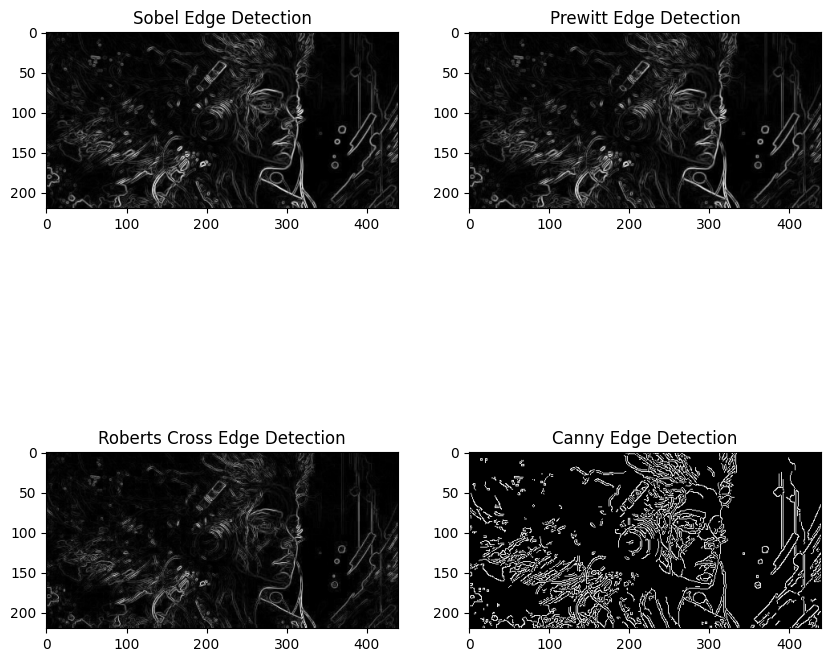

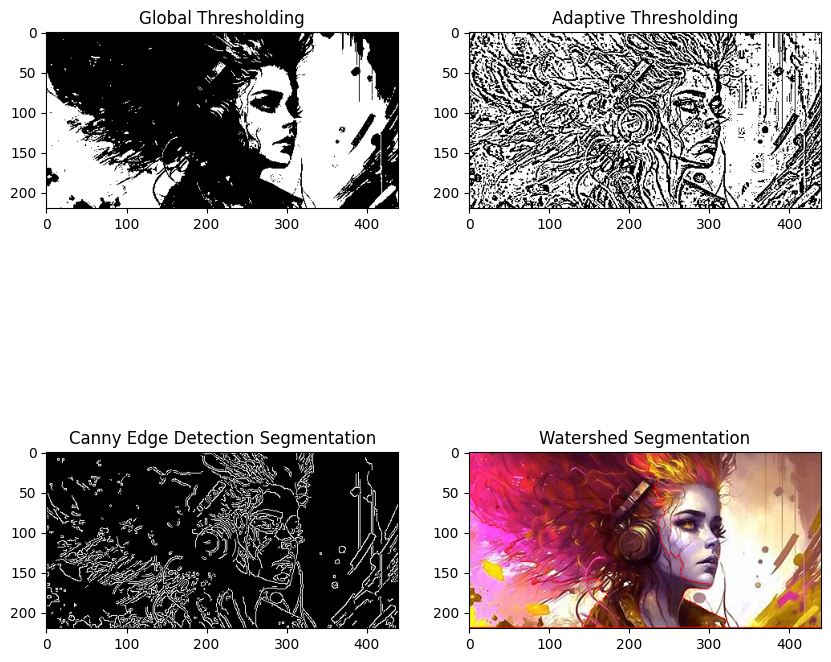

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel, prewitt, roberts
from skimage import io, color

image = cv2.imread('/content/th_lab5.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sobel_edges = sobel(gray_image)
prewitt_edges = prewitt(gray_image)
roberts_edges = roberts(gray_image)
canny_edges = cv2.Canny(gray_image, 100, 200)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(sobel_edges, cmap='gray')
axes[0, 0].set_title("Sobel Edge Detection")
axes[0, 1].imshow(prewitt_edges, cmap='gray')
axes[0, 1].set_title("Prewitt Edge Detection")
axes[1, 0].imshow(roberts_edges, cmap='gray')
axes[1, 0].set_title("Roberts Cross Edge Detection")
axes[1, 1].imshow(canny_edges, cmap='gray')
axes[1, 1].set_title("Canny Edge Detection")
plt.show()

_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
segmented_canny = canny_edges
gray_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)
_, binary = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(global_thresh, cmap='gray')
axes[0, 0].set_title("Global Thresholding")
axes[0, 1].imshow(adaptive_thresh, cmap='gray')
axes[0, 1].set_title("Adaptive Thresholding")
axes[1, 0].imshow(segmented_canny, cmap='gray')
axes[1, 0].set_title("Canny Edge Detection Segmentation")
axes[1, 1].imshow(image)
axes[1, 1].set_title("Watershed Segmentation")
plt.show()